Exploratory data analysis dataset
=================================

## CARGO LOS DATOS

In [16]:
import sys
import pandas as pd
import os

# Go up one level to the project root
sys.path.append(os.path.abspath(os.path.join('..')))

# Now you can import your function
from src.cleaning import load_data

# Use it (relative to the project root)
df = load_data("../data/01_raw/coronary_disease.csv")

In [3]:
df

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,M,50,1.0,Yes,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,M,51,3.0,Yes,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,F,48,2.0,Yes,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,F,44,1.0,Yes,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


## VEO CUANTOS MISSING VALUES HAY EN CADA CATEGORÍA

In [17]:
# 1. Ver el conteo exacto de valores faltantes por columna
missing_data = df.isnull().sum()

# 2. Calcular el porcentaje de valores faltantes (opcional pero muy útil)
missing_percentage = (df.isnull().sum() / len(df)) * 100

# 3. Crear una tabla resumen
resumen_missing = pd.DataFrame({
    'Valores Nulos': missing_data,
    'Porcentaje (%)': missing_percentage
})

# Mostrar solo las variables que tienen algún nulo
print(resumen_missing[resumen_missing['Valores Nulos'] > 0])
print(" ")
print("El data set contiene", len(df), "registros")

            Valores Nulos  Porcentaje (%)
education             105        2.477584
cigsPerDay             29        0.684285
BPMeds                 53        1.250590
totChol                50        1.179802
BMI                    19        0.448325
heartRate               1        0.023596
glucose               388        9.155262
 
El data set contiene 4238 registros


In [18]:
from src.cleaning import clean_data

# apply function clean_data
df_clean = clean_data(df)

# Checks
print(df_clean.isnull().sum()) # Should be all 0
print(df_clean[['sex', 'currentSmoker']].dtypes) # should be all int64

sex                0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64
sex              int64
currentSmoker    int64
dtype: object


In [19]:
# Ver estadísticas principales
numeric_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
print(df_clean[numeric_cols].describe())

               age   cigsPerDay      totChol        sysBP        diaBP  \
count  4218.000000  4218.000000  4218.000000  4218.000000  4218.000000   
mean     49.572309     9.091275   236.747511   132.325154    82.905880   
std       8.556892    11.923098    44.340952    21.964470    11.905447   
min      32.000000     0.000000   113.000000    83.500000    48.000000   
25%      42.000000     0.000000   206.000000   117.000000    75.000000   
50%      49.000000     0.000000   234.000000   128.000000    82.000000   
75%      56.000000    20.000000   262.750000   143.875000    89.500000   
max      70.000000    70.000000   696.000000   295.000000   142.500000   

               BMI    heartRate      glucose  
count  4218.000000  4218.000000  4218.000000  
mean     25.801181    75.877904    81.623518  
std       4.080241    12.030829    22.731569  
min      15.540000    44.000000    40.000000  
25%      23.070000    68.000000    72.000000  
50%      25.395000    75.000000    78.000000  
75% 

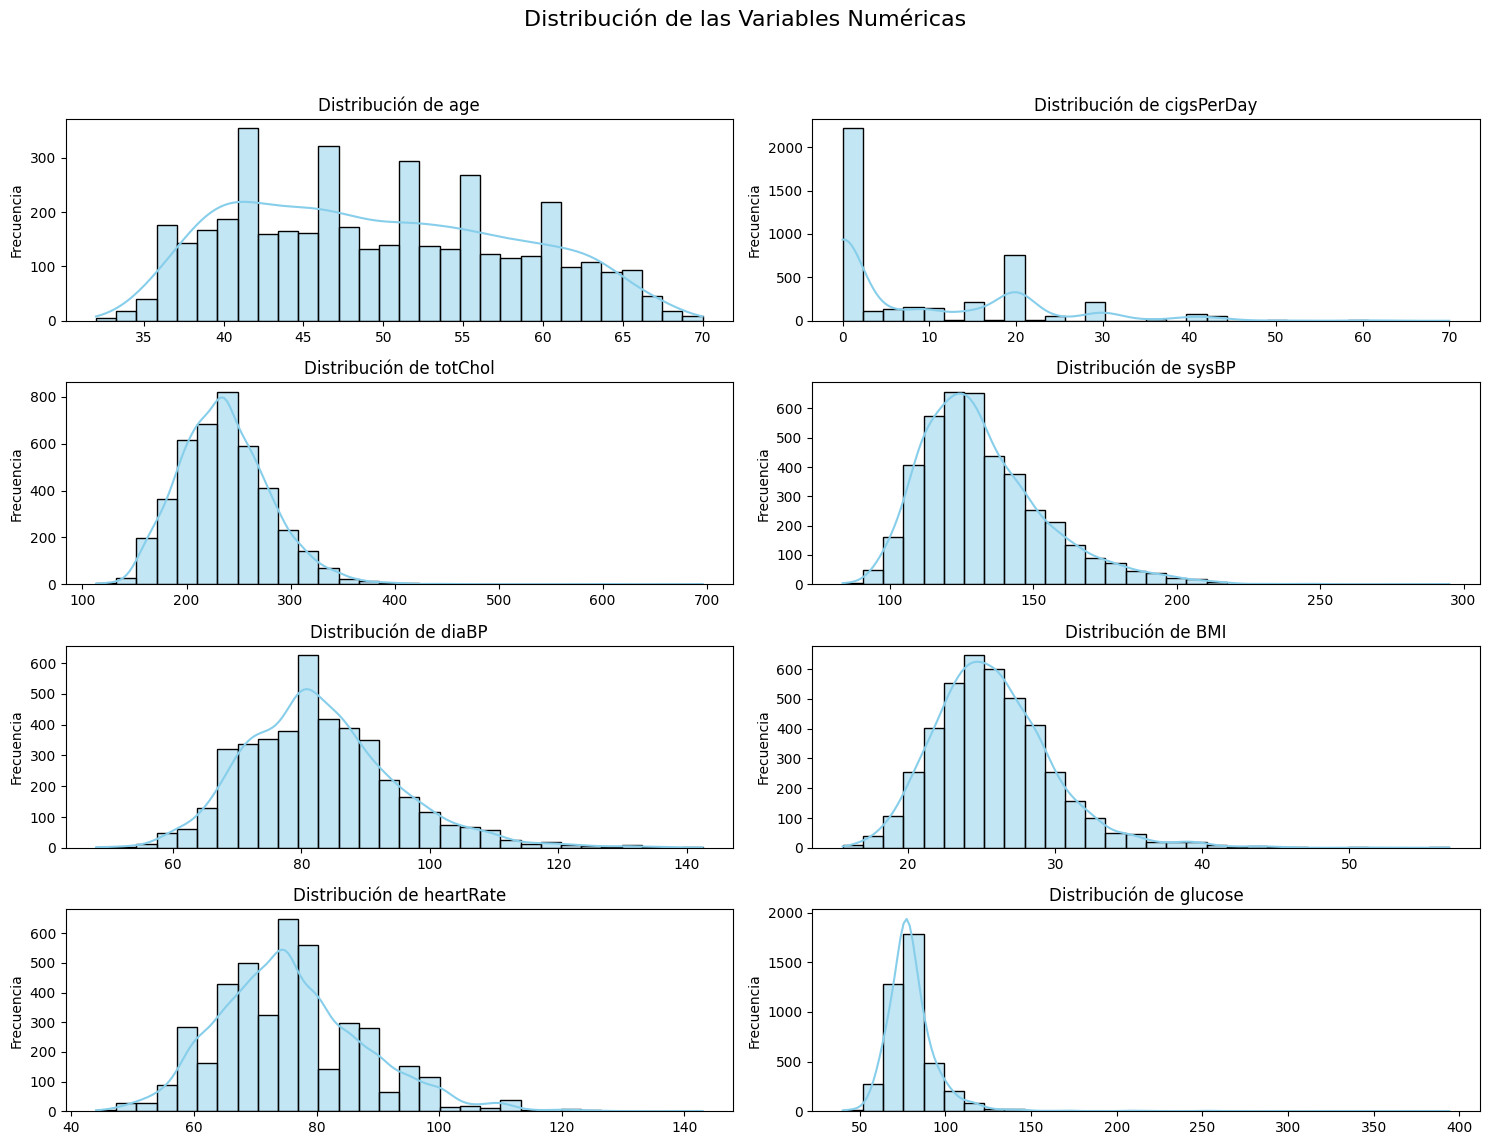

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables numéricas
numeric_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Configuramos la cuadrícula (4 filas x 2 columnas)
plt.figure(figsize=(15, 12))
plt.suptitle('Distribución de las Variables Numéricas', fontsize=16)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 2, i)
    # kde=True dibuja la línea de densidad
    sns.histplot(df_clean[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel('')
    plt.ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

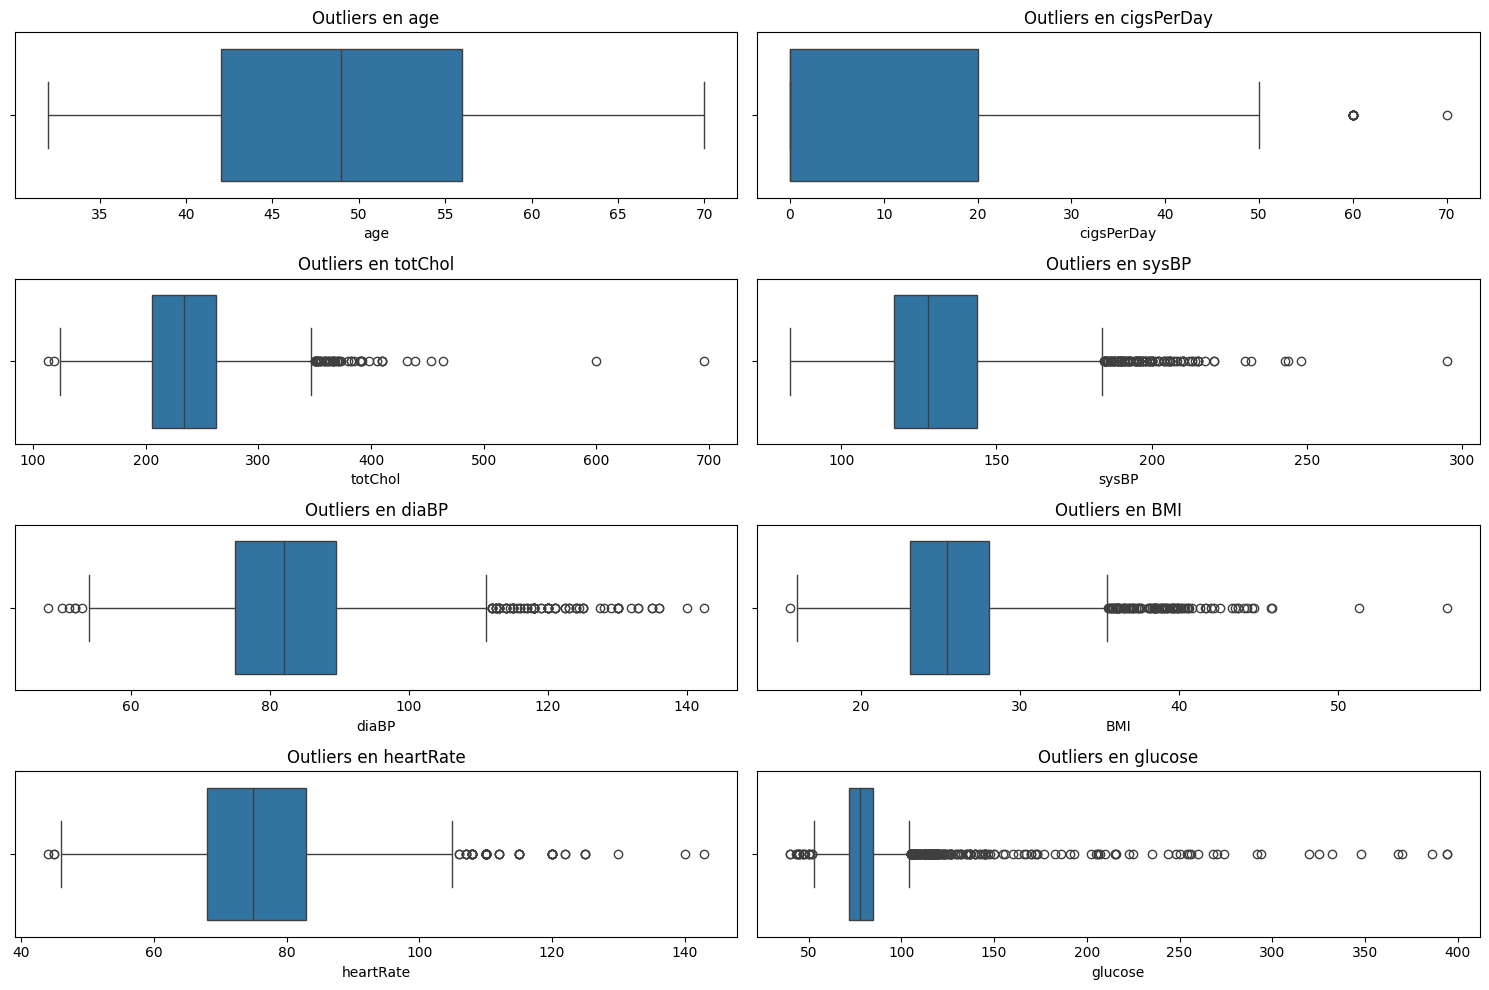

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos la cuadrícula de gráficos
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df_clean[col])
    plt.title(f'Outliers en {col}')

plt.tight_layout()
plt.show()

In [22]:
# define the path
output_path = "../data/02_cleaned/coronary_disease_clean.csv"

# Eexport csv
df_clean.to_csv(output_path, index=False)

In [23]:
###############################################################################################################3
###############################################################################################################3
###############################################################################################################3
###############################################################################################################3

In [24]:
import sys
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from src.visualization import *

# Go up one level to the project root
sys.path.append(os.path.abspath(os.path.join('..')))

# Now you can import your function
from src.cleaning import load_data

# Use it (relative to the project root)
df_clean = load_data("../data/02_cleaned/coronary_disease_clean.csv")

In [25]:
df_clean

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,1,50,1,1.0,0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4214,1,51,1,43.0,0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4215,0,48,1,20.0,0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4216,0,44,1,15.0,0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


## Comprobar distribuciones

In [26]:
import sys
import os
from src.visualization import *

# Go up one level to the project root
sys.path.append(os.path.abspath(os.path.join('..')))

# Now you can import your function
from src.cleaning import load_data

# Use it (relative to the project root)
df_clean = load_data("../data/02_cleaned/coronary_disease_clean.csv")

In [27]:
df_clean

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,1,50,1,1.0,0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4214,1,51,1,43.0,0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4215,0,48,1,20.0,0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4216,0,44,1,15.0,0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


In [28]:
# Promedio por sexo
df_avg_sex = group_and_average(df_clean, ['sex'])
df_avg_sex

,sex,BMI,BPMeds,TenYearCHD,age,cigsPerDay,currentSmoker,diaBP,diabetes,glucose,heartRate,prevalentHyp,prevalentStroke,sysBP,totChol
0,0,25.512636,0.036590,0.121830,49.794595,5.829938,0.409563,82.313306,0.023285,81.492308,77.101871,0.308108,0.005821,133.040956,239.462370
1,1,26.183944,0.019305,0.187534,49.277441,13.417540,0.607281,83.691947,0.028130,81.797573,74.254275,0.312741,0.004964,131.375621,233.146167


In [29]:
# Promedio por fumador
df_avg_smoker = group_and_average(df_clean, ['currentSmoker'])
df_avg_smoker

,currentSmoker,BMI,BPMeds,TenYearCHD,age,cigsPerDay,diaBP,diabetes,glucose,heartRate,prevalentHyp,prevalentStroke,sex,sysBP,totChol
0,0,26.478701,0.037054,0.142589,51.400094,0.00000,84.196529,0.032364,82.817542,75.153846,0.357880,0.007974,0.333959,135.202627,238.835835
1,1,25.108720,0.021093,0.157718,47.704219,18.38303,81.586769,0.018217,80.403164,76.617929,0.261266,0.002876,0.527804,129.384228,234.613135


In [30]:
# Promedio por diagnóstico
df_avg_chd = group_and_average(df_clean, ['TenYearCHD'])
df_avg_chd

,TenYearCHD,BMI,BPMeds,age,cigsPerDay,currentSmoker,diaBP,diabetes,glucose,heartRate,prevalentHyp,prevalentStroke,sex,sysBP,totChol
0,0,25.673007,0.023152,48.775732,8.800279,0.490098,82.179637,0.019247,80.476151,75.757880,0.276151,0.003905,0.410879,130.357601,235.168759
1,1,26.527093,0.063191,54.083728,10.739336,0.519747,87.018957,0.060032,88.121643,76.557662,0.502370,0.014218,0.537125,143.468404,245.688784
